<a href="https://colab.research.google.com/github/bharath967/Leaves_classification/blob/main/transfer_learning_image_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import cv2
import imageio
import pathlib
%matplotlib inline

In [ ]:
import tensorflow as tf
#tf.test.gpu_device_name()

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
rescaled=ImageDataGenerator(1/255)
trained_fed=rescaled.flow_from_directory('/content/drive/MyDrive/train test3new/train', target_size=(128,128),batch_size=32, class_mode='categorical')
test_fed=rescaled.flow_from_directory('/content/drive/MyDrive/train test3new/test', target_size=(128,128),batch_size=32, class_mode='categorical')

Found 1982 images belonging to 9 classes.
Found 553 images belonging to 9 classes.


In [ ]:
from tensorflow.keras.applications import ResNet50

# Initialize the Pretrained Model
feature_extractor = ResNet50(weights='imagenet', 
                             input_shape=(128, 128, 3),
                             include_top=False)

# Set this parameter to make sure it's not being trained
feature_extractor.trainable = False

# Set the input layer
input_ = tf.keras.Input(shape=(128, 128, 3))

# Set the feature extractor layer
x = feature_extractor(input_, training=False)

# Set the pooling layer
x = tf.keras.layers.GlobalAveragePooling2D()(x)

# Set the final layer with sigmoid activation function
output_ = tf.keras.layers.Dense(9, activation='sigmoid')(x)

# Create the new model object
model = tf.keras.Model(input_, output_)

# Compile it
model.compile(optimizer='adam',
             loss='binary_crossentropy',
             metrics=['accuracy'])

# Print The Summary of The Model
model.summary()

94765736/94765736 [==============================] - 0s 0us/step
Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 128, 128, 3)]     0         
                                                                 
 resnet50 (Functional)       (None, 4, 4, 2048)        23587712  
                                                                 
 global_average_pooling2d (G  (None, 2048)             0         
 lobalAveragePooling2D)                                          
                                                                 
 dense (Dense)               (None, 9)                 18441     
                                                                 
Total params: 23,606,153
Trainable params: 18,441
Non-trainable params: 23,587,712
_________________________________________________________________


In [6]:
history=model.fit(trained_fed, epochs=40, validation_data=test_fed)

/usr/local/lib/python3.7/dist-packages/keras/preprocessing/image.py:1663: UserWarning: This ImageDataGenerator specifies `featurewise_center`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn('This ImageDataGenerator specifies '


Epoch 1/40
62/62 [==============================] - 751s 12s/step - loss: 0.1755 - accuracy: 0.7634 - val_loss: 0.0986 - val_accuracy: 0.8608
Epoch 2/40
62/62 [==============================] - 25s 399ms/step - loss: 0.0407 - accuracy: 0.9667 - val_loss: 0.0814 - val_accuracy: 0.8861
Epoch 3/40
62/62 [==============================] - 25s 399ms/step - loss: 0.0253 - accuracy: 0.9834 - val_loss: 0.0731 - val_accuracy: 0.8951
Epoch 4/40
62/62 [==============================] - 24s 397ms/step - loss: 0.0182 - accuracy: 0.9894 - val_loss: 0.0705 - val_accuracy: 0.9132
Epoch 5/40
62/62 [==============================] - 26s 415ms/step - loss: 0.0140 - accuracy: 0.9939 - val_loss: 0.0720 - val_accuracy: 0.9042
Epoch 6/40
62/62 [==============================] - 25s 399ms/step - loss: 0.0109 - accuracy: 0.9965 - val_loss: 0.0671 - val_accuracy: 0.9096
Epoch 7/40
62/62 [==============================] - 25s 402ms/step - loss: 0.0092 - accuracy: 0.9955 - val_loss: 0.0685 - val_accuracy: 0.9042


In [7]:
model.save('/content/drive/MyDrive/train test3new/lemonTodayresnet50_leaves_modelwith40epoch.hdf5')

In [8]:
#=========================================================================================================================================

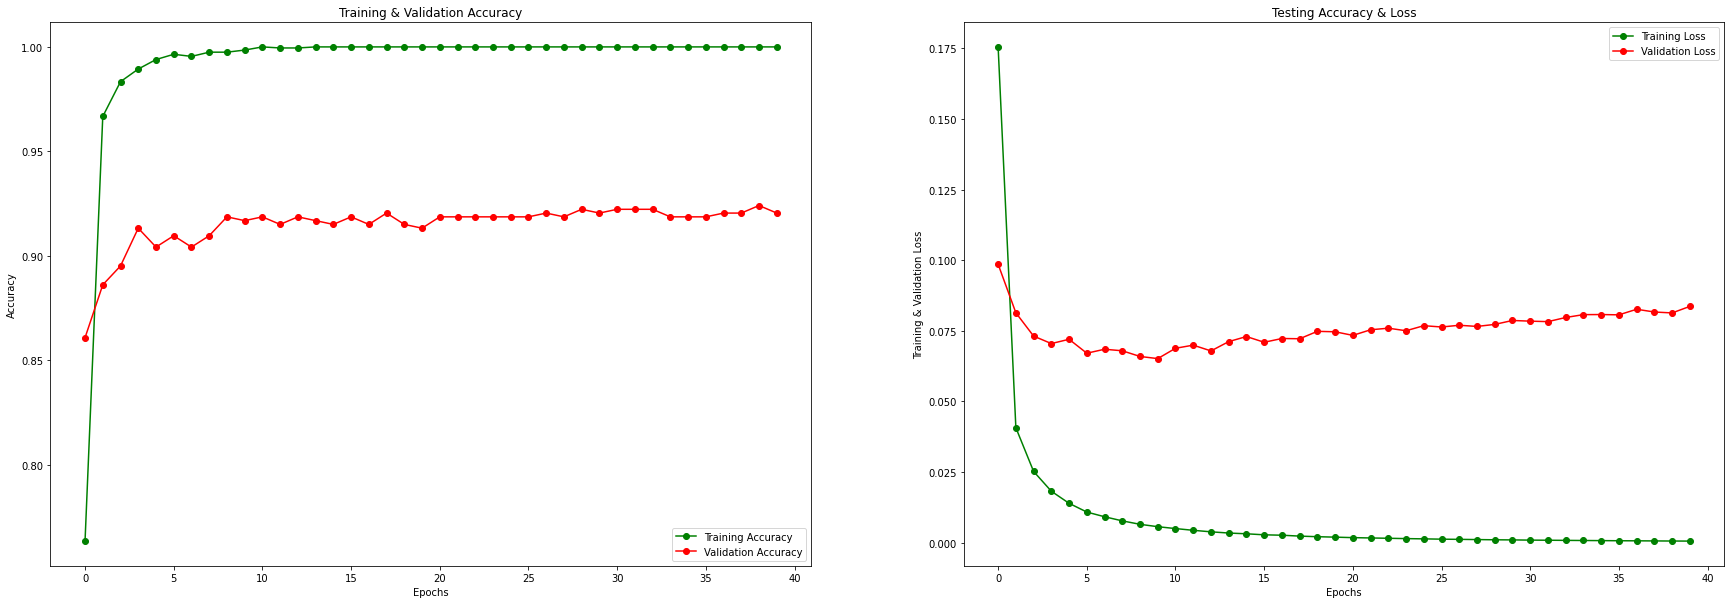

In [9]:
epochs = [i for i in range(40)]
fig , ax = plt.subplots(1,2)
train_acc = history.history['accuracy']
train_loss = history.history['loss']
val_acc = history.history['val_accuracy']
val_loss = history.history['val_loss']
fig.set_size_inches(30,10)

ax[0].plot(epochs , train_acc , 'go-' , label = 'Training Accuracy')
ax[0].plot(epochs , val_acc , 'ro-' , label = 'Validation Accuracy')
ax[0].set_title('Training & Validation Accuracy')
ax[0].legend()
ax[0].set_xlabel("Epochs")
ax[0].set_ylabel("Accuracy")

ax[1].plot(epochs , train_loss , 'g-o' , label = 'Training Loss')
ax[1].plot(epochs , val_loss , 'r-o' , label = 'Validation Loss')
ax[1].set_title('Testing Accuracy & Loss')
ax[1].legend()
ax[1].set_xlabel("Epochs")
ax[1].set_ylabel("Training & Validation Loss")
plt.show()

In [10]:
from keras.callbacks import ReduceLROnPlateau

In [11]:
lr_rate=ReduceLROnPlateau(monitor='val_loss')

In [12]:
from tensorflow.keras.optimizers import Adam 
model.compile(loss='categorical_crossentropy', optimizer='Adam',metrics=['accuracy'])

In [13]:
#hist=model.fit_generator(trained_fed, epochs=30, validation_data=test_fed,callbacks=[lr_rate])

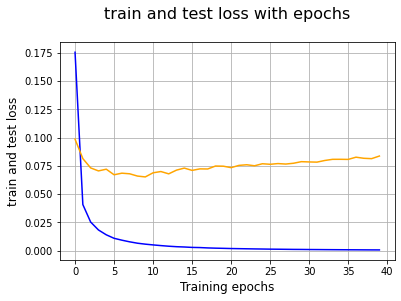

In [14]:
plt.plot(history.history['loss'],color='blue',label='train')
plt.plot(history.history['val_loss'],color='orange',label='train')
plt.grid(True)
plt.title("train and test loss with epochs\n",fontsize=16)
plt.xlabel("Training epochs",fontsize=12)
plt.ylabel("train and test loss", fontsize=12)
plt.show()

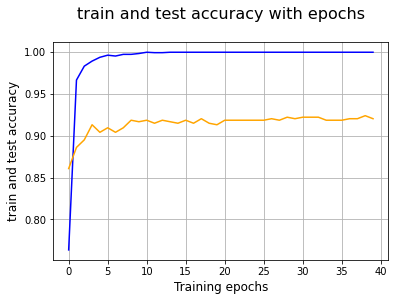

In [15]:
plt.plot(history.history['accuracy'],color='blue',label='train')
plt.plot(history.history['val_accuracy'],color='orange',label='train')
plt.grid(True)
plt.title("train and test accuracy with epochs\n",fontsize=16)
plt.xlabel("Training epochs",fontsize=12)
plt.ylabel("train and test accuracy", fontsize=12)
plt.show()

In [16]:
accuracy=model.evaluate(test_fed,steps=len(test_fed), verbose=2)
print('%.2f'%(accuracy[1]*100))

18/18 - 8s - loss: 0.4739 - accuracy: 0.9204 - 8s/epoch - 437ms/step
92.04
